# 2-Dimension

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

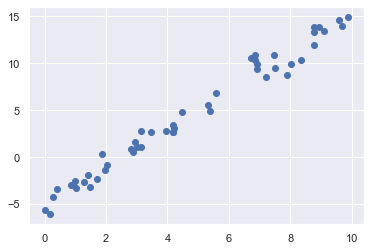

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

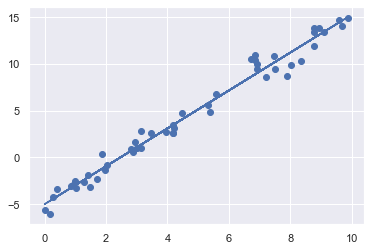

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = x.reshape((-1,1))
model.fit(X, y)
plt.scatter(x, y)
plt.plot(x, model.predict(X), label = 'Regression Line')

In [4]:
print('Slope:', model.coef_[0])
print('Intercept_', model.intercept_)

Slope: 2.027208810360695
Intercept_ -4.998577085553202


## Multi-dimension

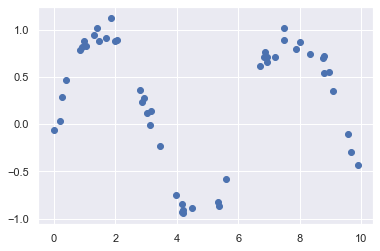

In [5]:
rng = np.random.RandomState(1)
x = 10* rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

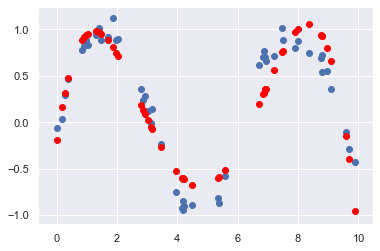

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
X = x.reshape((-1,1))
model.fit(X, y)
plt.scatter(x, y)
plt.scatter(x, model.predict(X), color = 'red', label = 'Regression Line')

# Regularization

## Ridge Regression

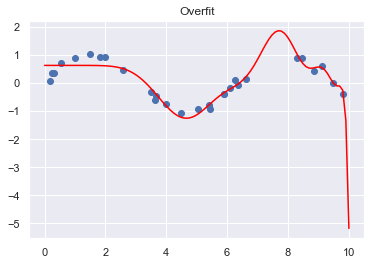

In [7]:
np.random.seed(207)
x = np.random.rand(30) * 10
y = np.sin(x) + np.random.normal(0, 1, 30) / 10
X = x.reshape((-1,1))
complex_model = make_pipeline(PolynomialFeatures(degree = 20), LinearRegression())
complex_model.fit(X, y)
X_pred = np.linspace(0, 10, 100)
y_pred = complex_model.predict(X_pred[:, np.newaxis])
plt.scatter(x, y)
plt.title('Overfit')
plt.plot(X_pred, y_pred, color = 'red')

In [8]:
%%HTML
<h2>Addressing Overfitting with <b>Regularization</b></h2>

In [9]:
%%HTML
<h3>Ridge Regression</h3>

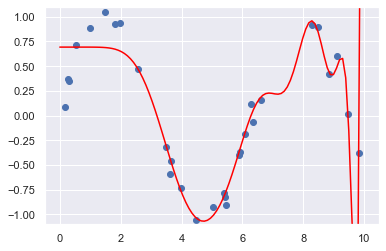

In [10]:
from sklearn.linear_model import Ridge
model_ridge = make_pipeline(PolynomialFeatures(20), Ridge(alpha = 1e6))
model_ridge.fit(X, y)
y_pred = model_ridge.predict(X_pred.reshape((-1,1)))
plt.ylim(-1.1, 1.1)
plt.scatter(x, y)
plt.plot(X_pred, y_pred, color = 'red')


In [11]:
%%HTML
<h3>Lasso Regression</h3>

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6806871205254277, tolerance: 0.0012603054124737294
  positive)


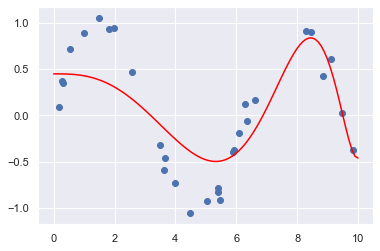

In [12]:
from sklearn.linear_model import Lasso
model_lasso = make_pipeline(PolynomialFeatures(degree = 20), Lasso(alpha = 1))
model_lasso.fit(X, y)
y_pred = model_lasso.predict(X_pred.reshape((-1,1)))
plt.scatter(x, y)
plt.plot(X_pred, y_pred, color = 'red')

# Example: Predicting Bicycle Traffic

In [14]:
import os
os.chdir('C:/Users/dell/PycharmProjects/MachineLearning')
os.getcwd()

'C:\\Users\\dell\\PycharmProjects\\MachineLearning'

In [18]:
import pandas as pd
df = pd.read_csv('./pandas/datasets/Fremont_Bridge.csv', index_col = 0, parse_dates = True)
df.head(10)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0
2019-01-01 05:00:00,3.0,1.0
2019-01-01 06:00:00,4.0,7.0
2019-01-01 07:00:00,1.0,2.0
2019-01-01 08:00:00,8.0,9.0


In [16]:
df1 = df.resample('D').sum()
df1.head(10)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0
2012-10-08,1829.0,1708.0,3537.0
2012-10-09,1759.0,1742.0,3501.0
2012-10-10,1648.0,1587.0,3235.0
2012-10-11,1579.0,1468.0,3047.0


In [23]:
names = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df1['Day'] = names[df1.index.dayofweek]
df1.head(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,day,Day
Date,,,,,
2012-10-03,1760.0,1761.0,3521.0,Wed,Wed
2012-10-04,1708.0,1767.0,3475.0,Thu,Thu
2012-10-05,1558.0,1590.0,3148.0,Fri,Fri
2012-10-06,1080.0,926.0,2006.0,Sat,Sat
2012-10-07,1191.0,951.0,2142.0,Sun,Sun


In [26]:
%%HTML
<h3>The patterns of use generally vary from day to day</h3>

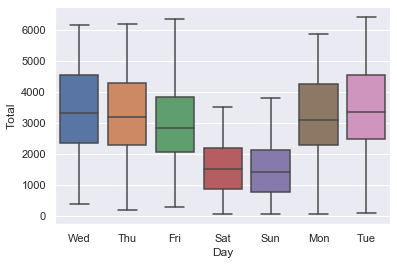

In [25]:
sns.boxplot(data = df1, x = 'Day', y = 'Total')